Implementing RNN to predict trends

Source of data : Yahoo Finance <br>
Time Period Taken : 1st January 2016 - 31st December 2021

# Importing Libraries

In [211]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [212]:
connection=pymysql.connect(host='localhost',port=int(3306),user=user,passwd=password,db='google_stock_prices')
connection

In [213]:
training_dataset=pd.read_sql_query("SELECT * FROM googlestockprices1621 ",conn)

In [214]:
training_set=training_dataset.iloc[:,1:2]

In [215]:
print(training_set.head(5))
print(training_set.tail(5))

         Open
0  743.000000
1  746.450012
2  730.000000
3  730.309998
4  731.450012
             Open
1505  2941.790039
1506  2949.270020
1507  2967.489990
1508  2928.590088
1509  2929.000000


In [216]:
training_set=training_set.values 
training_set

array([[ 743.      ],
       [ 746.450012],
       [ 730.      ],
       ...,
       [2967.48999 ],
       [2928.590088],
       [2929.      ]])

2 Dimensional Numpy Array 

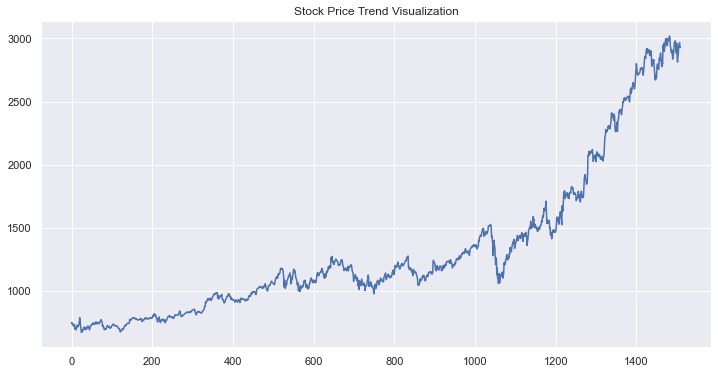

In [217]:
plt.figure(figsize=(12,6))
plt.plot(training_dataset["Open"])
plt.title("Stock Price Trend Visualization")
plt.show()

# Normalization of Data

In [218]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_training_set=sc.fit_transform(training_set) ##fit_transform expects a 2D array

Xnorm is the difference of X and Xmin divided by the difference of Xmax and Xmin 

# Creating a data structure with 60 timestamps and 1 output

At each time t the rnn will use 60 previous timestamps(t-60 to t-1) to predit the output at time t.

In [219]:
x_train=[]
y_train=[]
for i in range(60,len(scaled_training_set)):
    x_train.append(scaled_training_set[i-60:i])
    y_train.append(scaled_training_set[i])
    

For each financial day x train contains the data of 60 previous stock prices.<br>
For each financial day y train contains the data of stock price on that day.

In [220]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [221]:
x_train.shape

(1450, 60, 1)

1450 samples 60 prices per sample 1 indicator(Open price)

The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:<br>

Samples. One sequence is one sample. A batch is comprised of one or more samples.<br>

Time Steps. One time step is one point of observation in the sample.<br>

Features. One feature is one observation at a time step.

# Model Building

Keras provides three inbuilt RNNs.
SimpleRNN
GRU 
LSTM

LSTM model will be used for this project.LSTM is useful in solving the problem of vanishing gradient in RNN.Due to <br>
vanishing gradient problem in traditional RNNs weights arent trained properly.


Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer.

Dropout: to add dropout regularization to prevent overfitting

Sequential groups a linear stack of layers.

In [222]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [223]:
regressor=Sequential()

In [224]:
regressor.add(LSTM(units=50,return_sequences=True,activation="tanh",input_shape=(60,1)))

units: Number of LSTM cell in the LSTM layer<br>
return Sequences : True to return the entire output sequence False to return last output


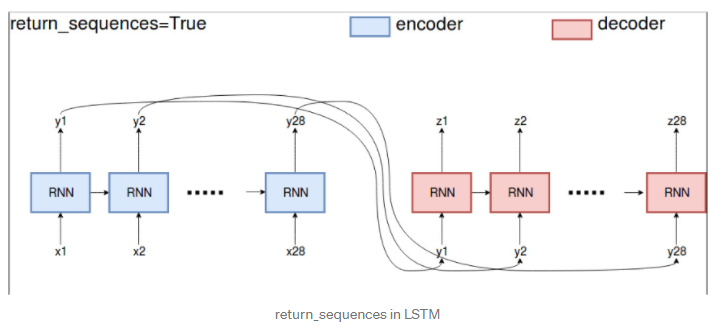

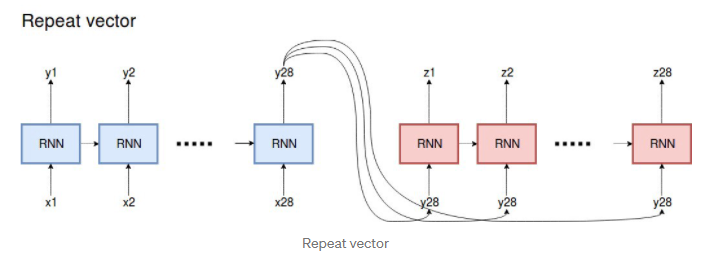

In [225]:
regressor.add(Dropout(0.2))

20% neurons will dropped in each iteration

In [226]:
regressor.add(LSTM(units=50,return_sequences=True,activation="tanh"))

In [227]:
regressor.add(Dropout(0.2))

In [228]:
regressor.add(LSTM(units=50,return_sequences=True,activation="tanh"))

In [229]:
regressor.add(Dropout(0.2))

In [230]:
regressor.add(LSTM(units=50,return_sequences=False,activation="tanh"))

In [231]:
regressor.add(Dropout(0.2))

In [232]:
regressor.add(Dense(units=1)) 

# Compiling and Fitting

In [233]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

optimizer: adam adagrad rmsprop <br>
mean_squared_error : loss function for regression problems

In [234]:
regressor.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
46/46 [==============================] - 6s 130ms/step - loss: 0.0139
Epoch 2/50
46/46 [==============================] - 6s 132ms/step - loss: 0.0027
Epoch 3/50
46/46 [==============================] - 6s 134ms/step - loss: 0.0023
Epoch 4/50
46/46 [==============================] - 7s 158ms/step - loss: 0.0025
Epoch 5/50
46/46 [==============================] - 8s 168ms/step - loss: 0.0019
Epoch 6/50
46/46 [==============================] - 8s 172ms/step - loss: 0.0027
Epoch 7/50
46/46 [==============================] - 8s 169ms/step - loss: 0.0025
Epoch 8/50
46/46 [==============================] - 8s 166ms/step - loss: 0.0021
Epoch 9/50
46/46 [==============================] - 7s 161ms/step - loss: 0.0021
Epoch 10/50
46/46 [==============================] - 7s 161ms/step - loss: 0.0021
Epoch 11/50
46/46 [==============================] - 6s 138ms/step - loss: 0.0022
Epoch 12/50
46/46 [==============================] - 6s 124ms/step - loss: 0.0018
Epoch 13/50
46/46 [======

No of iterations of the data:50 <br>
No of weight updates per iteration:46

# Evaluation 

Importing the test data <br>
Source Yahoo Finance <br>
Google Stock Price 01-22

In [235]:
testing_dataset=pd.read_csv("Google Stock Prices 01-22.csv")
testing_set=testing_dataset.iloc[:,1:2].values

In [237]:
total_dataset=pd.concat((training_dataset['Open'],testing_dataset['Open']),axis=0)

The model is trained to predict stock price at t based on stock price of 60 previous stock prices

In [238]:
inputs=total_dataset[len(total_dataset)-len(testing_dataset)-60:].values

In [239]:
inputs=inputs.reshape(-1,1)

In [240]:
inputs=sc.transform(inputs)

# Creating a data structure with 60 timestamps

In [241]:
x_test=[]
for i in range(60,79):
    x_test.append(inputs[i-60:i])
    
    

In [242]:
x_test=np.array(x_test)

In [243]:
x_test.shape

(19, 60, 1)

# Model Prediction

In [244]:
predicted_price=regressor.predict(x_test)

In [245]:
predicted_price=sc.inverse_transform(predicted_price)

# Visualization

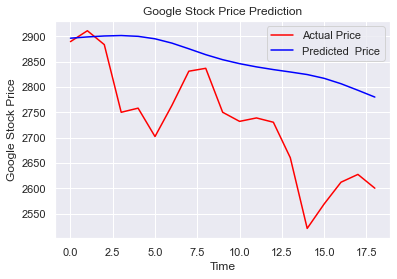

In [246]:
plt.plot(testing_set, color = 'red', label = 'Actual Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted  Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

The Model is able to predict the downward trend of the Google Stock Price